In [44]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
print(data.shape)

(299, 13)


In [6]:
data['age'] = data['age'].astype(int)
data['platelets'] = data['platelets'].astype(int)

In [8]:
dataForPlot = data[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']]

age


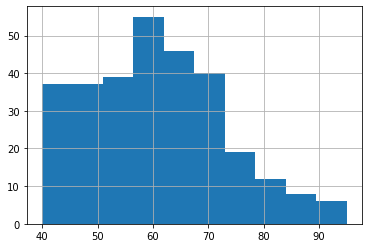

creatinine_phosphokinase


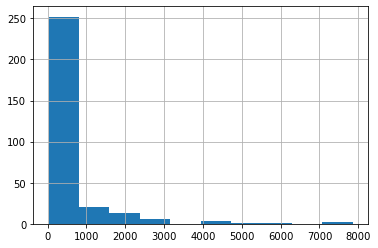

ejection_fraction


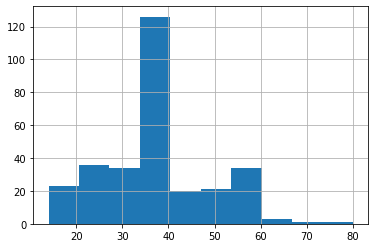

platelets


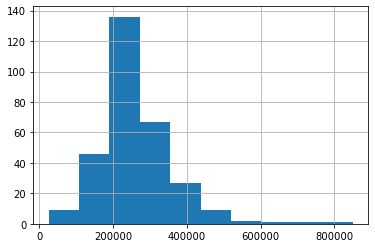

serum_creatinine


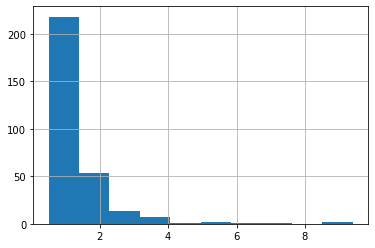

serum_sodium


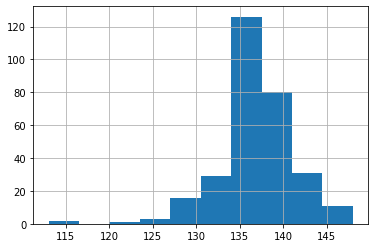

In [9]:
for i in dataForPlot.keys():
  dataForPlot[i].hist()
  print(i)
  plt.show()

In [10]:
#zliczenie plci
Male = 0
Female = 0
for x in data['sex']:
    if( x == 1):
        Male+=1
    else:
        Female+=1

#palaczy
smoker = 0
noSmoker = 0
for x in data['smoking']:
    if( x == 1):
        smoker+=1
    else:
        noSmoker+=1

#anemia
anaemia = 0
noAnaemia = 0
for x in data['anaemia']:
    if( x == 1):
        anaemia+=1
    else:
        noAnaemia+=1

#diabetes
diabetes = 0
noDiabetes = 0
for x in data['diabetes']:
    if( x == 1):
        diabetes+=1
    else:
        noDiabetes+=1

#cisnienie
highBloodPressure = 0
noHighBloodPressure = 0
for x in data['high_blood_pressure']:
    if( x == 1):
        highBloodPressure+=1
    else:
        noHighBloodPressure+=1


#DEATH_EVENT
deathEvent = 0
noDeathEvent = 0
for x in data['DEATH_EVENT']:
    if( x == 1):
        deathEvent+=1
    else:
        noDeathEvent+=1

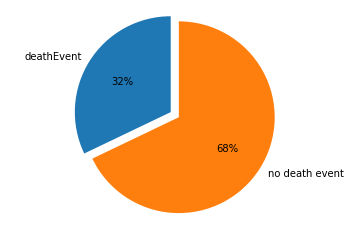

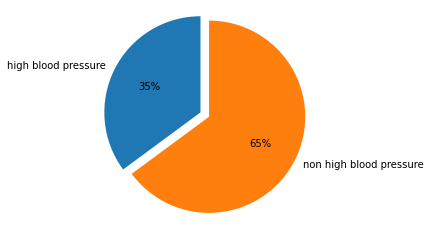

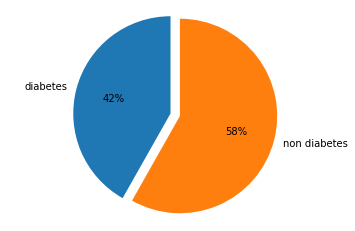

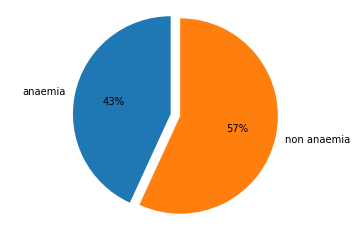

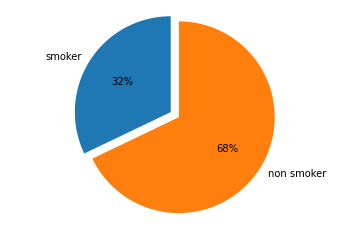

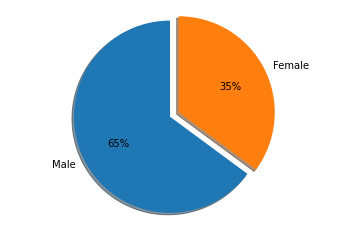

In [11]:
labels = 'deathEvent', 'no death event'
sizes = [deathEvent, noDeathEvent]

fig1, ax1 = plt.subplots()
explode = (0, 0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

labels = 'high blood pressure', 'non high blood pressure'
sizes = [highBloodPressure, noHighBloodPressure]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


labels = 'diabetes', 'non diabetes'
sizes = [diabetes, noDiabetes]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


labels = 'anaemia', 'non anaemia'
sizes = [anaemia, noAnaemia]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#rozklad palaczy
labels = 'smoker', 'non smoker'
sizes = [smoker, noSmoker]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#rozklad po wieku 
labels = 'Male', 'Female'
sizes = [Male, Female]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

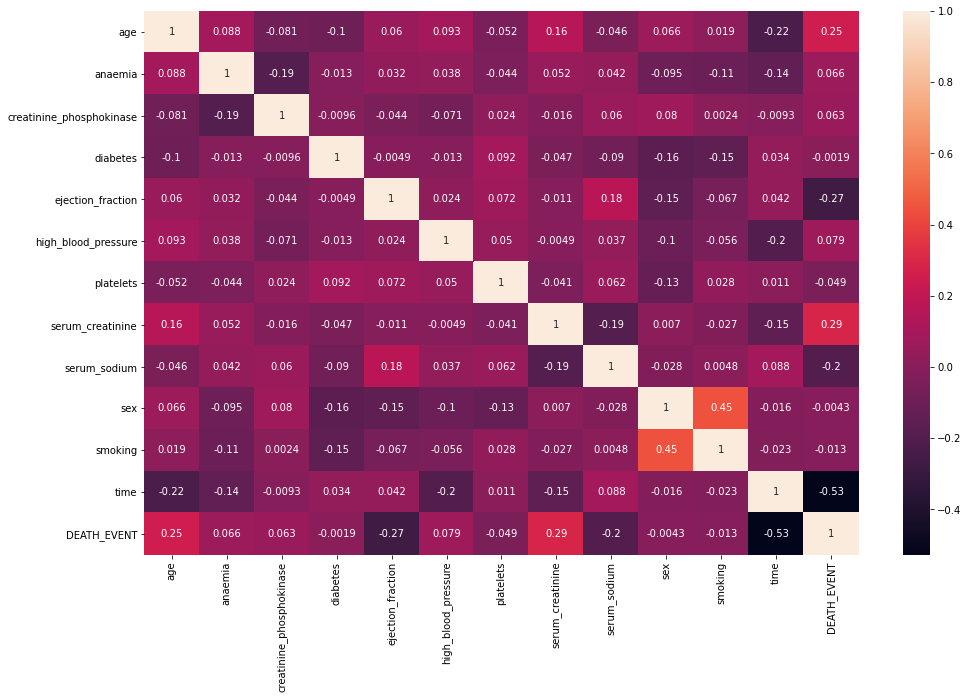

In [12]:
corrMatrix = data.corr()
plt.figure(figsize=(16,10))
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

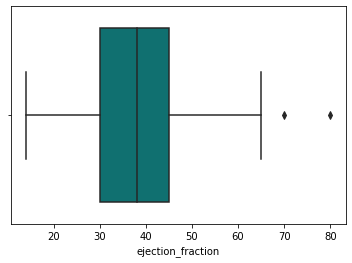

In [13]:
sn.boxplot(x = data.ejection_fraction, color = 'teal')
plt.show()

In [14]:
#data = data[data['ejection_fraction']<70]

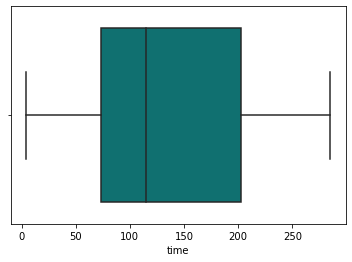

In [15]:
sn.boxplot(x=data.time, color = 'teal')
plt.show()

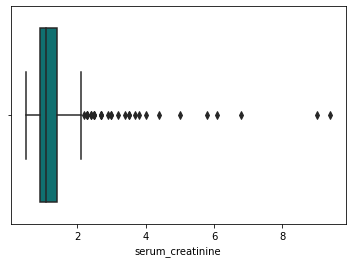

In [16]:
sn.boxplot(x=data.serum_creatinine, color = 'teal')
plt.show()

In [17]:
#podzielnie danych

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
Features = ['time','ejection_fraction','serum_creatinine']
x = data[Features]
y = data["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [20]:
#drzewo decyzyjne

In [22]:
accuracy_list = []

In [23]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
t_pred = clf.predict(x_test)
t_acc = accuracy_score(y_test, t_pred)

accuracy_list.append(100*t_acc)

In [28]:
print(100*t_acc,"%")

85.0 %


In [29]:
print(classification_report(y_test,t_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        43
           1       0.75      0.71      0.73        17

    accuracy                           0.85        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.85      0.85      0.85        60



<AxesSubplot:>

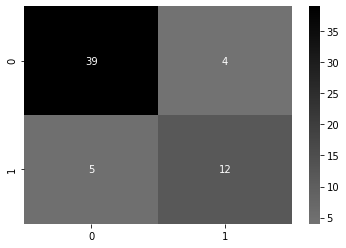

In [30]:
sn.heatmap(confusion_matrix(y_test,t_pred),annot=True, cmap='binary',center=0)

In [31]:
#Logistic Rregresion

In [32]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [33]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

In [34]:
print(100 *log_reg_acc,"%")

90.0 %


In [35]:
print(classification_report(y_test,log_reg_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.87      0.76      0.81        17

    accuracy                           0.90        60
   macro avg       0.89      0.86      0.87        60
weighted avg       0.90      0.90      0.90        60



<AxesSubplot:>

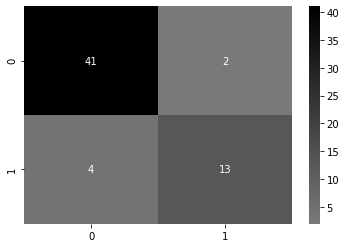

In [36]:
sn.heatmap(confusion_matrix(y_test,log_reg_pred),annot=True, cmap='binary',center=0)

In [37]:
#KNeighborsClassifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)

In [40]:
print(100*kn_acc,"%")

91.66666666666666 %


In [41]:
print(classification_report(y_test, kn_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       1.00      0.71      0.83        17

    accuracy                           0.92        60
   macro avg       0.95      0.85      0.89        60
weighted avg       0.93      0.92      0.91        60



<AxesSubplot:>

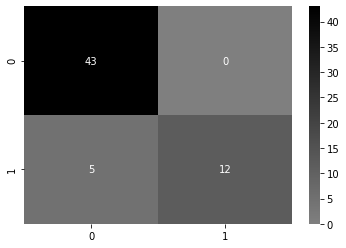

In [42]:
sn.heatmap(confusion_matrix(y_test,kn_pred),annot=True, cmap='binary',center=0)

In [43]:
#tf.keras.models.Sequential()

In [45]:
import tensorflow as tf
np.random.seed(0)
# Initialising the ANN

ann = tf.keras.models.Sequential()

In [46]:
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )

In [47]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

8/8 [==============================] - 0s 14ms/step - loss: 2.4205 - accuracy: 0.3305
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 1.9393 - accuracy: 0.3305
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 1.5513 - accuracy: 0.3305
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 1.2850 - accuracy: 0.3305
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 1.0919 - accuracy: 0.3305
Epoch 6/100
8/8 [=====

8/8 [==============================] - 0s 5ms/step - loss: 0.4709 - accuracy: 0.7908
Epoch 78/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.7908
Epoch 79/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4701 - accuracy: 0.7908
Epoch 80/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4700 - accuracy: 0.7866
Epoch 81/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4700 - accuracy: 0.7908
Epoch 82/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4708 - accuracy: 0.7908
Epoch 83/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4689 - accuracy: 0.7908
Epoch 84/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4693 - accuracy: 0.7866
Epoch 85/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.7866
Epoch 86/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4691 - accuracy: 0.7866
Epoch 87/100
8/8 [===============

In [48]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

In [49]:
ac = accuracy_score(y_test,y_pred)
accuracy_list.append(100*ac)
print("Accuracy")
print(ac*100)

Accuracy
86.66666666666667


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        43
           1       1.00      0.53      0.69        17

    accuracy                           0.87        60
   macro avg       0.92      0.76      0.80        60
weighted avg       0.89      0.87      0.85        60



<AxesSubplot:>

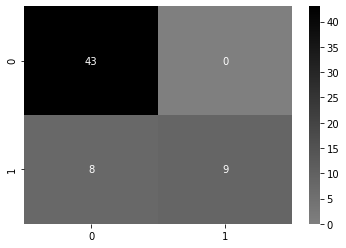

In [51]:
sn.heatmap(confusion_matrix(y_test,y_pred),annot=True, cmap='binary',center=0)

In [52]:
#kot

In [53]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(x_train, y_train)

Learning rate set to 0.005591
0:	learn: 0.6898135	total: 46.9ms	remaining: 46.9s
1:	learn: 0.6853805	total: 47.5ms	remaining: 23.7s
2:	learn: 0.6814385	total: 48ms	remaining: 15.9s
3:	learn: 0.6764012	total: 48.5ms	remaining: 12.1s
4:	learn: 0.6732585	total: 49ms	remaining: 9.76s
5:	learn: 0.6694012	total: 49.5ms	remaining: 8.2s
6:	learn: 0.6649489	total: 50ms	remaining: 7.09s
7:	learn: 0.6609728	total: 50.5ms	remaining: 6.26s
8:	learn: 0.6571671	total: 51ms	remaining: 5.61s
9:	learn: 0.6521731	total: 51.5ms	remaining: 5.1s
10:	learn: 0.6485641	total: 51.9ms	remaining: 4.66s
11:	learn: 0.6441080	total: 52.3ms	remaining: 4.31s
12:	learn: 0.6410089	total: 52.9ms	remaining: 4.01s
13:	learn: 0.6371346	total: 53.4ms	remaining: 3.76s
14:	learn: 0.6329689	total: 53.9ms	remaining: 3.54s
15:	learn: 0.6289573	total: 54.2ms	remaining: 3.33s
16:	learn: 0.6247416	total: 54.7ms	remaining: 3.16s
17:	learn: 0.6210853	total: 55ms	remaining: 3s
18:	learn: 0.6177724	total: 55.5ms	remaining: 2.86s
19:	lea

304:	learn: 0.2935059	total: 184ms	remaining: 420ms
305:	learn: 0.2930548	total: 185ms	remaining: 419ms
306:	learn: 0.2924758	total: 185ms	remaining: 418ms
307:	learn: 0.2922886	total: 186ms	remaining: 418ms
308:	learn: 0.2919639	total: 186ms	remaining: 417ms
309:	learn: 0.2917889	total: 187ms	remaining: 416ms
310:	learn: 0.2913251	total: 187ms	remaining: 415ms
311:	learn: 0.2911220	total: 188ms	remaining: 414ms
312:	learn: 0.2906955	total: 188ms	remaining: 413ms
313:	learn: 0.2903350	total: 189ms	remaining: 412ms
314:	learn: 0.2899102	total: 189ms	remaining: 411ms
315:	learn: 0.2895469	total: 190ms	remaining: 411ms
316:	learn: 0.2893742	total: 190ms	remaining: 410ms
317:	learn: 0.2892063	total: 191ms	remaining: 409ms
318:	learn: 0.2889985	total: 191ms	remaining: 408ms
319:	learn: 0.2885945	total: 191ms	remaining: 407ms
320:	learn: 0.2884280	total: 192ms	remaining: 406ms
321:	learn: 0.2882100	total: 192ms	remaining: 405ms
322:	learn: 0.2880875	total: 193ms	remaining: 404ms
323:	learn: 

679:	learn: 0.2120638	total: 365ms	remaining: 172ms
680:	learn: 0.2119356	total: 365ms	remaining: 171ms
681:	learn: 0.2117943	total: 366ms	remaining: 171ms
682:	learn: 0.2117562	total: 366ms	remaining: 170ms
683:	learn: 0.2116724	total: 366ms	remaining: 169ms
684:	learn: 0.2115850	total: 367ms	remaining: 169ms
685:	learn: 0.2114602	total: 367ms	remaining: 168ms
686:	learn: 0.2113049	total: 368ms	remaining: 168ms
687:	learn: 0.2112996	total: 368ms	remaining: 167ms
688:	learn: 0.2112121	total: 368ms	remaining: 166ms
689:	learn: 0.2109727	total: 369ms	remaining: 166ms
690:	learn: 0.2108061	total: 369ms	remaining: 165ms
691:	learn: 0.2106540	total: 370ms	remaining: 165ms
692:	learn: 0.2105739	total: 370ms	remaining: 164ms
693:	learn: 0.2104431	total: 371ms	remaining: 163ms
694:	learn: 0.2101887	total: 371ms	remaining: 163ms
695:	learn: 0.2099818	total: 371ms	remaining: 162ms
696:	learn: 0.2098980	total: 372ms	remaining: 162ms
697:	learn: 0.2097275	total: 372ms	remaining: 161ms
698:	learn: 

In [54]:
y_pred = classifier.predict(x_test)
ac = accuracy_score(y_test, y_pred)
accuracy_list.append(100*ac)

In [55]:
print(ac*100,"%")

91.66666666666666 %


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.88      0.82      0.85        17

    accuracy                           0.92        60
   macro avg       0.90      0.89      0.90        60
weighted avg       0.92      0.92      0.92        60



<AxesSubplot:>

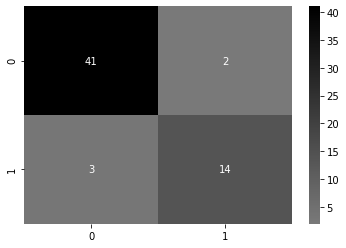

In [57]:
sn.heatmap(confusion_matrix(y_test,y_pred),annot=True, cmap='binary',center=0)

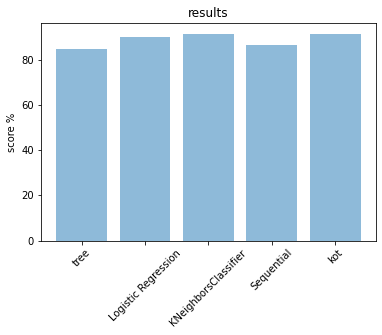

In [66]:
objects = ('tree', 'Logistic Regression', 'KNeighborsClassifier', 'Sequential', 'kot')
y_pos = np.arange(len(objects))
performance = accuracy_list

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects,rotation=45)
plt.ylabel('score %')
plt.title('results')

plt.show()